In [78]:
import numpy as np
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [83]:
df = pd.read_csv('/Users/macbook/py-adult-data-analysis/data/adult.csv')

columns_to_drop = ['age', 'workclass', 'education', 'marital-status', 'occupation', 'relationship','race','sex', 'hours-per-week', 'native-country', 'salary', 'salary K$']
for column in columns_to_drop:
    df = df[df[column] != '?']

df['Salary_check'] =  np.where(df['salary K$'] <= 50, '<=50K', '>50K')

print(df.head())
print(df['salary'].value_counts())
print(df['Salary_check'].value_counts())

   Unnamed: 0  age         workclass  education      marital-status  \
0           0   39         State-gov  Bachelors       Never-married   
1           1   50  Self-emp-not-inc  Bachelors  Married-civ-spouse   
2           2   38           Private    HS-grad            Divorced   
3           3   53           Private       11th  Married-civ-spouse   
4           4   28           Private  Bachelors  Married-civ-spouse   

          occupation   relationship   race     sex  hours-per-week  \
0       Adm-clerical  Not-in-family  White    Male              40   
1    Exec-managerial        Husband  White    Male              13   
2  Handlers-cleaners  Not-in-family  White    Male              40   
3  Handlers-cleaners        Husband  Black    Male              40   
4     Prof-specialty           Wife  Black  Female              40   

  native-country salary  salary K$ Salary_check  
0  United-States  <=50K         39        <=50K  
1  United-States  <=50K         35        <=50K  
2 

In [39]:
df.info

<bound method DataFrame.info of        Unnamed: 0  age         workclass   education      marital-status  \
0               0   39         State-gov   Bachelors       Never-married   
1               1   50  Self-emp-not-inc   Bachelors  Married-civ-spouse   
2               2   38           Private     HS-grad            Divorced   
3               3   53           Private        11th  Married-civ-spouse   
4               4   28           Private   Bachelors  Married-civ-spouse   
...           ...  ...               ...         ...                 ...   
32556       32556   27           Private  Assoc-acdm  Married-civ-spouse   
32557       32557   40           Private     HS-grad  Married-civ-spouse   
32558       32558   58           Private     HS-grad             Widowed   
32559       32559   22           Private     HS-grad       Never-married   
32560       32560   52      Self-emp-inc     HS-grad  Married-civ-spouse   

              occupation   relationship   race     sex 

# Task 1
Print the count of men and women in the dataset.

In [14]:
count_gender = df['sex'].value_counts()
print("Count of Men:", count_gender['Male'])
print("Count of Women:", count_gender['Female'])

Count of Men: 20380
Count of Women: 9782


# Task 2
Find the average age of men in dataset

In [27]:
average_age_by_gender = df.groupby('sex')['age'].mean()
average_age_men = average_age_by_gender.get('Male', 0)
print("Avg Man:", average_age_men)

Avg Man: 39.18400392541707


# Task 3
Get the percentage of people from Poland (native-country)

In [41]:
count_people_total = len(df)
count_people_poland = len(df[df['native-country'] == 'Poland'])
percentage_polish = (count_people_poland / count_people_total) * 100
print(percentage_polish)


0.18566408063125786


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [42]:
average_age_by_salary = df.groupby('salary')['age'].mean()
av_more_50K = average_age_by_salary.get('>50K', 0)
av_less_50K = average_age_by_salary.get('<=50K', 0)
std_age_by_salary = df.groupby('salary')['age'].std()
std_more_50K = std_age_by_salary.get('>50K', 0)
std_less_50K = std_age_by_salary.get('<=50K', 0)

print("AVG 50K+:", av_more_50K)
print("STD 50K+:", std_more_50K)
print("AVG 50K-:", av_less_50K)
print("STD 50k-:", std_less_50K)

AVG 50K+: 43.95911028236548
STD 50K+: 10.269632835673844
AVG 50K-: 36.60806038668668
STD 50k-: 13.464631257161628


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [49]:
low_edu_data = df[df['education'].isin(['Assoc-acdm', 'Assoc-voc', '10th', '11th', '12th', '9th'])]
hight_incom_ed = low_edu_data[low_edu_data['salary'] == '>50K']
print(hight_incom_ed)

       Unnamed: 0  age  workclass   education      marital-status  \
117           117   49  Local-gov   Assoc-voc  Married-civ-spouse   
127           127   31    Private  Assoc-acdm  Married-civ-spouse   
143           143   45    Private   Assoc-voc       Never-married   
248           248   40    Private  Assoc-acdm  Married-civ-spouse   
308           308   35    Private  Assoc-acdm  Married-civ-spouse   
...           ...  ...        ...         ...                 ...   
32245       32245   31    Private  Assoc-acdm            Divorced   
32416       32416   33    Private  Assoc-acdm  Married-civ-spouse   
32474       32474   36    Private  Assoc-acdm  Married-civ-spouse   
32506       32506   38    Private   Assoc-voc  Married-civ-spouse   
32545       32545   39  Local-gov  Assoc-acdm  Married-civ-spouse   

           occupation   relationship   race     sex  hours-per-week  \
117      Craft-repair        Husband  Black    Male              40   
127      Adm-clerical        

# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [48]:
education = df.groupby('education')['age'].describe()
print(education)

               count       mean        std   min   25%   50%   75%   max
education                                                               
10th           820.0  37.897561  16.225795  17.0  23.0  36.0  52.0  90.0
11th          1048.0  32.363550  15.089307  17.0  18.0  28.5  43.0  90.0
12th           377.0  32.013263  14.373710  17.0  19.0  28.0  41.0  79.0
1st-4th        151.0  44.622517  14.929051  19.0  33.0  44.0  56.0  81.0
5th-6th        288.0  41.649306  14.754622  17.0  28.0  41.0  53.0  82.0
7th-8th        557.0  47.631957  15.737479  17.0  34.0  49.0  60.0  90.0
9th            455.0  40.303297  15.335754  17.0  28.0  38.0  53.0  90.0
Assoc-acdm    1008.0  37.286706  10.509755  19.0  29.0  36.0  44.0  90.0
Assoc-voc     1307.0  38.246366  11.181253  19.0  30.0  37.0  45.0  84.0
Bachelors     5044.0  38.641554  11.577566  19.0  29.0  37.0  46.0  90.0
Doctorate      375.0  47.130667  11.471727  24.0  39.0  47.0  54.0  80.0
HS-grad       9840.0  38.640955  13.067730  17.0  2

# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [58]:
men_number = df[df['sex'] == 'Male'].copy()

men_number.loc[:, 'marital_status_cat'] = men_number['relationship'].apply(lambda x: 'Husband' if x.startswith('Husband') else 'Non-Married')

salary_comparison = men_number.groupby(['marital_status_cat'])['salary K$'].mean()

print(salary_comparison)

marital_status_cat
Husband        108.810865
Non-Married     46.932811
Name: salary K$, dtype: float64


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [64]:
max_hour = df['hours-per-week'].max()
print("max hours per week:", max_hour)
people_count_per_hour = df['hours-per-week'].value_counts()
print(people_count_per_hour)

max hours per week: 99
hours-per-week
40    14251
50     2718
45     1753
60     1405
35     1184
      ...  
82        1
94        1
92        1
87        1
74        1
Name: count, Length: 94, dtype: int64


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

In [98]:
df['is_male_gender'] = np.where(df['sex'] == 'Male', 1, 0)
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.corr()

,Unnamed: 0,age,hours-per-week,salary K$,is_male_gender
Unnamed: 0,1.000000,-0.001126,-0.001890,0.000129,-0.001405
age,-0.001126,1.000000,0.101599,0.208203,0.081993
hours-per-week,-0.001890,0.101599,1.000000,0.196378,0.231268
salary K$,0.000129,0.208203,0.196378,1.000000,0.182642
is_male_gender,-0.001405,0.081993,0.231268,0.182642,1.000000


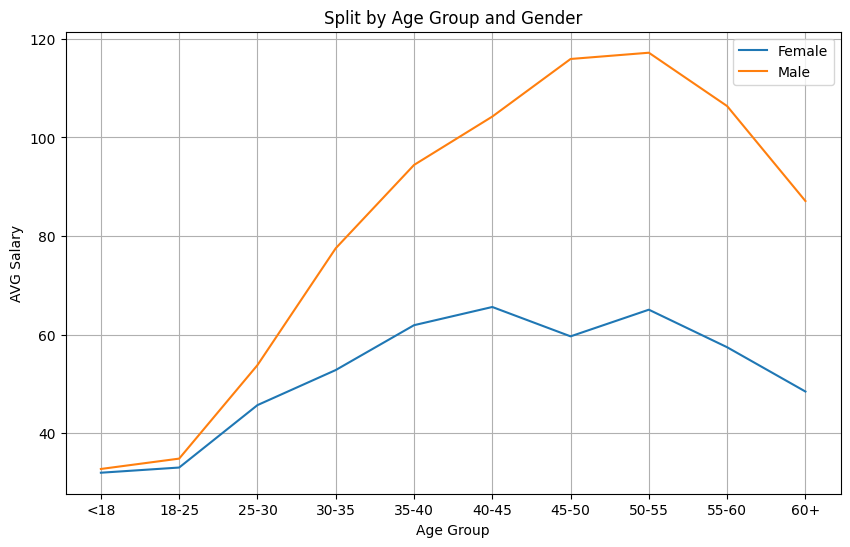

In [106]:
import matplotlib.pyplot as plt
age_bins = [0, 18, 25, 30, 35, 40, 45, 50, 55, 60, float('inf')]
age_labels = ["<18", "18-25", "25-30", "30-35", "35-40", "40-45", "45-50", "50-55", "55-60", "60+"]
df['Age Group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

salary_by_age_gender = df.groupby(['Age Group', 'sex'], observed=False)['salary K$'].mean().unstack()

plt.figure(figsize=(10, 6))

for gender in salary_by_age_gender.columns:
    plt.plot(salary_by_age_gender.index, salary_by_age_gender[gender], label=gender)

plt.xlabel("Age Group")
plt.ylabel("AVG Salary")
plt.title("Split by Age Group and Gender")
plt.legend()
plt.grid(True)
plt.show()

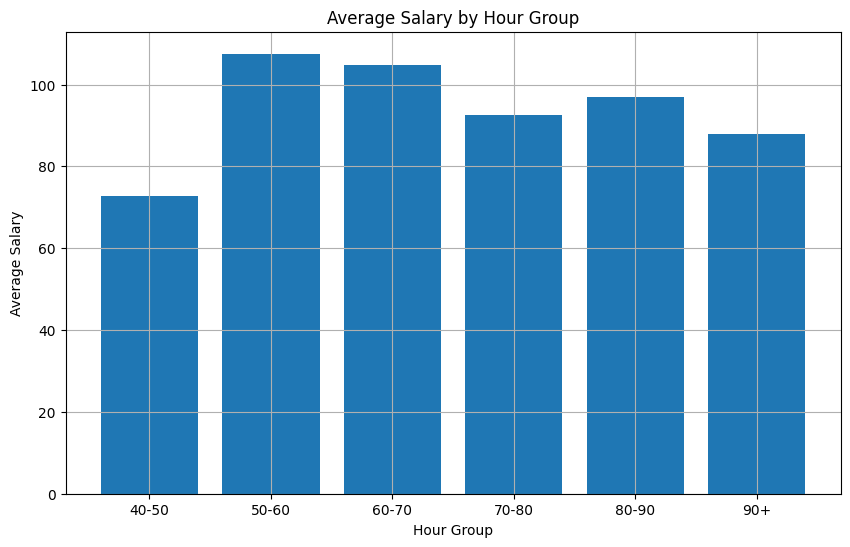

In [114]:
hours_bins = [40, 50, 60, 70, 80, 90, float('inf')]
hours_labels = ["40-50", "50-60", "60-70", "70-80", "80-90", "90+"]
df['Hour_group'] = pd.cut(df['hours-per-week'], bins=hours_bins, labels=hours_labels, right=False)

salary_by_hour = df.groupby('Hour_group', observed=False)['salary K$'].mean()

plt.figure(figsize=(10, 6))

plt.bar(salary_by_hour.index, salary_by_hour.values)

plt.xlabel("Hour Group")
plt.ylabel("Average Salary")
plt.title("Average Salary by Hour Group")
plt.grid(True)
plt.show()